# Assignment 11: Clustering Customers of a Comic Book Store

In this assignment, you will be solving a traditional problem in quantitative marketing: Customer segmentation. Having a properly segmented database is extremely important to define marketing campaigns, as it allows companies to define value-centric actions targeted towards customers of different profiles. While there are several ways we can cluster customers, in this example we will use the [Recency, Frequency and Monetary Value](https://en.wikipedia.org/wiki/RFM_(market_research)), or RFM, paradigm to do so. This way of thinking of customer data reflects the engagement between a customer and a company by reducing their interactions to three values:

- The **Recency** between interactions: The time between two subsequent purchases or between two general interactions between the customer and your organization.

- The **Frequency** of interactions: The raw number of interactions over a predefined time. This can be for example how many times a customer visits your website every month, or how many purchases the customer does at your store, etc.

- The **Monetary Value** of the interactions: The total monetary value (not necessarily positive) of the interactions of the customer with your organization over the same period of time as before.

Additionally, this dataset has a **Cost of Service** variable (which is not included in the MV calculations for this example). It shows how much cost each interaction with the customer brings. This can be useful information as a customer may make purchases of small monetary value, but may spend many hours at the store occupying the service personnel's time. This can mean on average these customers may even end up being a cost to the company! The information comes from a local comic book store, and represents the summary of interactions of the customers with a loyalty card.

In this assignment, we will create a clustering of the customers using these four variables and will create a commercial strategy arising from our results.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

In [2]:
# Uncomment if working in the cloud
#!gdown https://drive.google.com/uc?id=1VL-LjrjgCtGWkDw914MVLj2sEttlL2Uv

## Task 1: Studying the data [10 pts]

Import the data and present the descriptive statistics of all variables. **Written answer: What can you say about the variables you have? Why should you normalize the data?**. Normalize the data so you can create clusters.

In [3]:
# Read the data
df = pd.read_csv('RFM_Assignment_Week11.csv')
print(df.describe())
print(df.head())

           Recency    Frequency            MV           CoS
count  1000.000000  1000.000000   1000.000000   1000.000000
mean     30.116293    17.164128   8806.972152   8805.228492
std      17.742131    29.419952   3391.111080   3285.384316
min      -4.942628    -1.237633    760.115629    944.136187
25%      18.221827     3.710640   8065.394231   9957.361435
50%      28.588186     6.030687  10462.416975  10000.463454
75%      35.880252     9.999136  10608.634596  10041.297949
max      67.258701   102.189321  11139.504803  11054.536104
    Recency   Frequency           MV          CoS
0  0.756050  101.017816  1240.328031  1049.275429
1 -1.441917   99.257682  1048.723617  1046.474190
2 -1.850722   98.941549  1080.081477   973.500361
3  5.040092   98.533635  1128.207864  1003.273138
4  5.503914   99.427978  1073.346452   961.793413


In [4]:
# Normalize (Standard) and apply to the data
y = df.CoS
X = df.drop(['CoS'], axis = 'columns')

stand_pip = StandardScaler()
stand_pip.fit(X,y)

print('The decriptive statistics of X')
print(X.head())
print('The decriptive statistics of CoS')
print(y.head())

The decriptive statistics of X
    Recency   Frequency           MV
0  0.756050  101.017816  1240.328031
1 -1.441917   99.257682  1048.723617
2 -1.850722   98.941549  1080.081477
3  5.040092   98.533635  1128.207864
4  5.503914   99.427978  1073.346452
The decriptive statistics of CoS
0    1049.275429
1    1046.474190
2     973.500361
3    1003.273138
4     961.793413
Name: CoS, dtype: float64


**Written answer:** The reason we normalize data is to change the values of variables in the dataset to a common scale. Since we did not know the distribution of our data, nomalize allows us to assume the data has a Gaussian distribution.

## Task 2: K-Means Clustering and Silhoutte Analysis [30 pts]

Now we can perform the cluster analysis. The single most important question in cluster analysis is to determine the number of clusters that you should create. Following the labs (or [this tutorial](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)), try between 3 and 8 clusters, using a seed of 10, and plot their silouhette analyses (we will plot the clusters themselves in the next question). **Written answer: What is the optimal number of clusters using the silhouette method?**

For n_clusters = 3 The average silhouette_score is : 0.9221428762038931
For n_clusters = 4 The average silhouette_score is : 0.8536081996783402
For n_clusters = 5 The average silhouette_score is : 0.8002017270395368
For n_clusters = 6 The average silhouette_score is : 0.7168366540651124
For n_clusters = 7 The average silhouette_score is : 0.6872072598240911
For n_clusters = 8 The average silhouette_score is : 0.6381952663804539


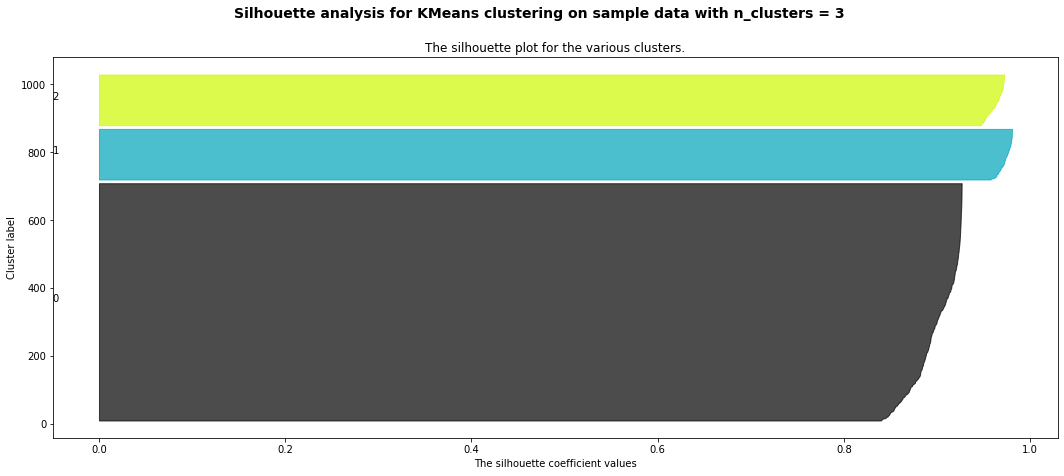

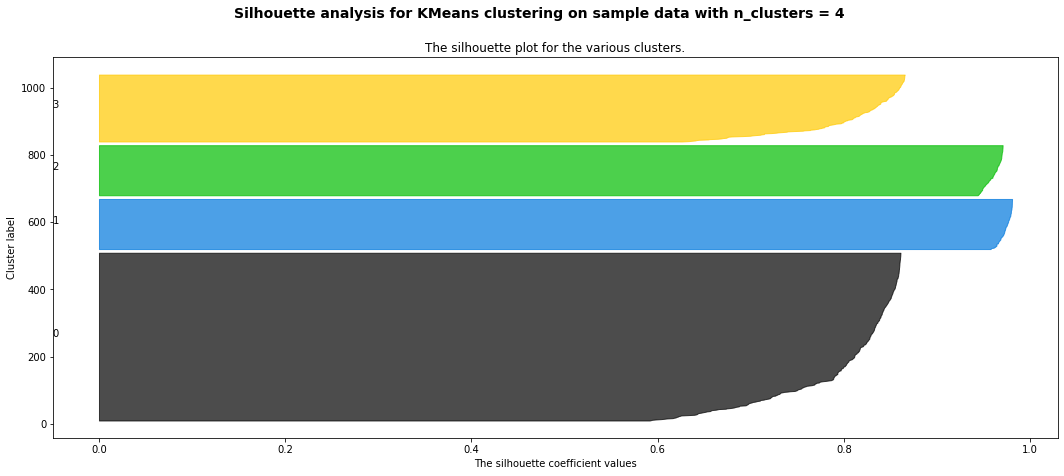

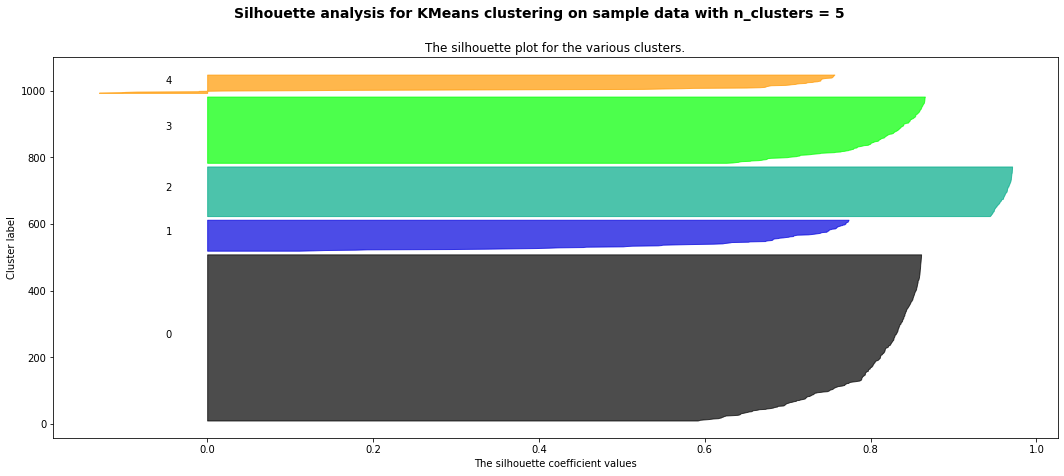

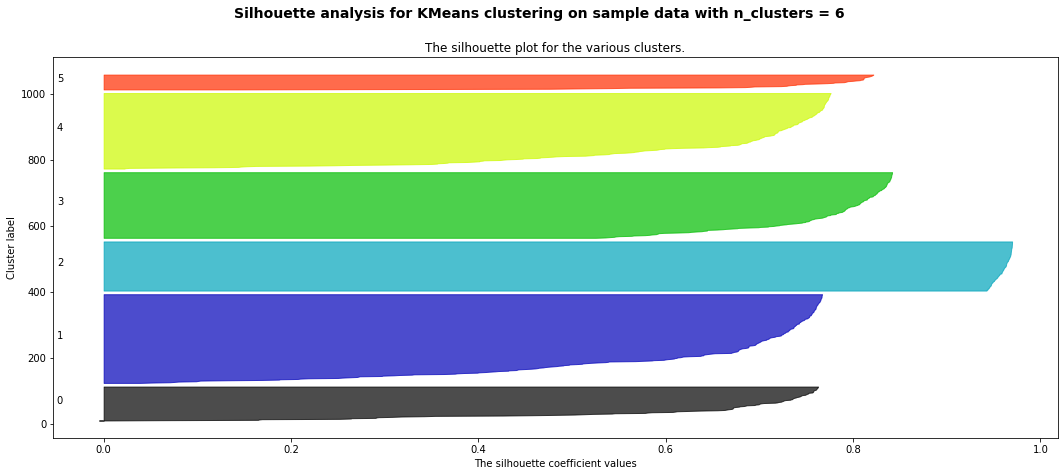

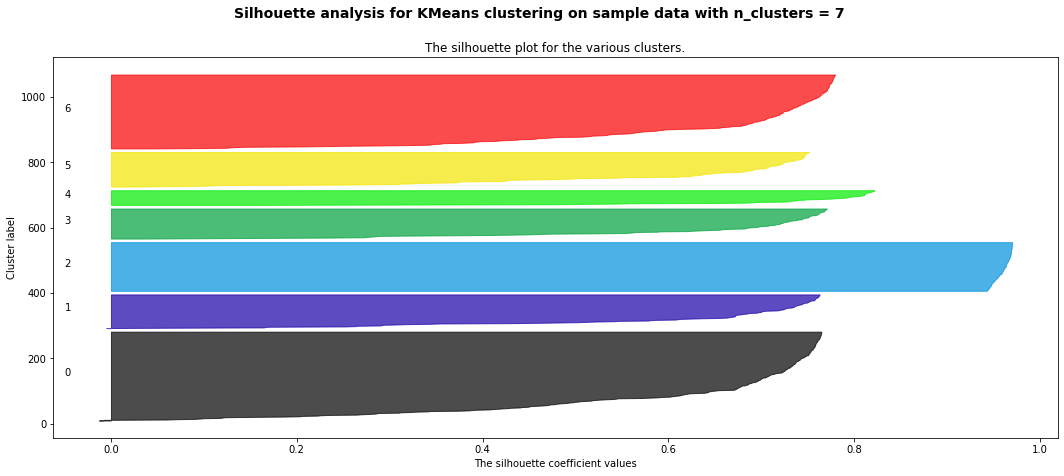

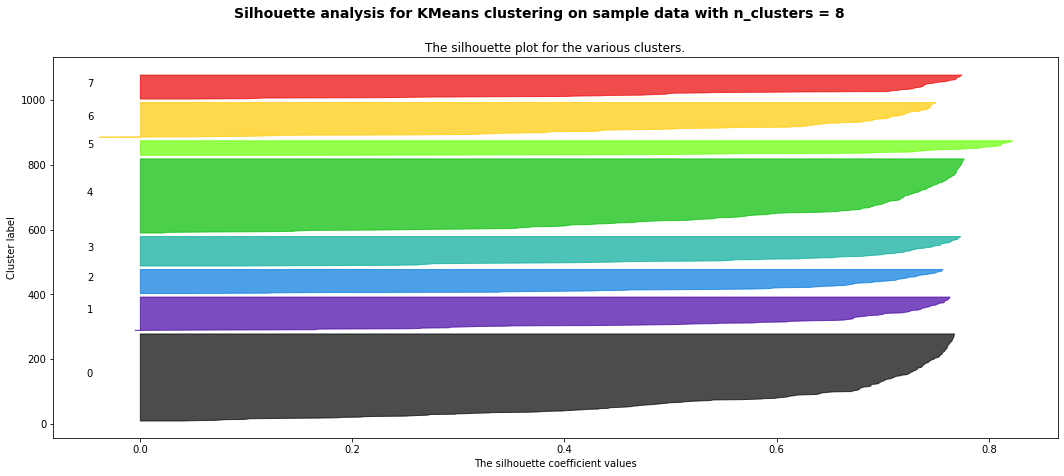

In [5]:
# Your answer here.
range_n_clusters = [3, 4, 5, 6, 7, 8]
num_seeds = 10

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    clusterer = KMeans(n_clusters=n_clusters, random_state = num_seeds)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label") 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')      

**Written answer:** when n_cluster = 7 or 8, the average silhouette_scoure is rather low. Therefor they are not a good pick for the given data. From the thickness of the silhouette plot, when n_cluster = 6, the similar thickness can be presented as a sign of a good pick. So, 6 is the optimal number.


## Task 3: Plotting the clusters [20 pts]

Now we will visualize what we just did. For this we will use a common trick in clustering: use a PCA transform to reduce the data to a few variables (two or three) and plot those. Apply a PCA transform to the data using two components and create a scatterplot, differentiating by using colours the clusters from previous answer using a different colour. **Note the clusters still must be calculated over the unrotated data**. Use only your results from using 3, 4 and 5 clusters. **Written answer: How many clusters would you use considering the results of task 2 and these ones?**

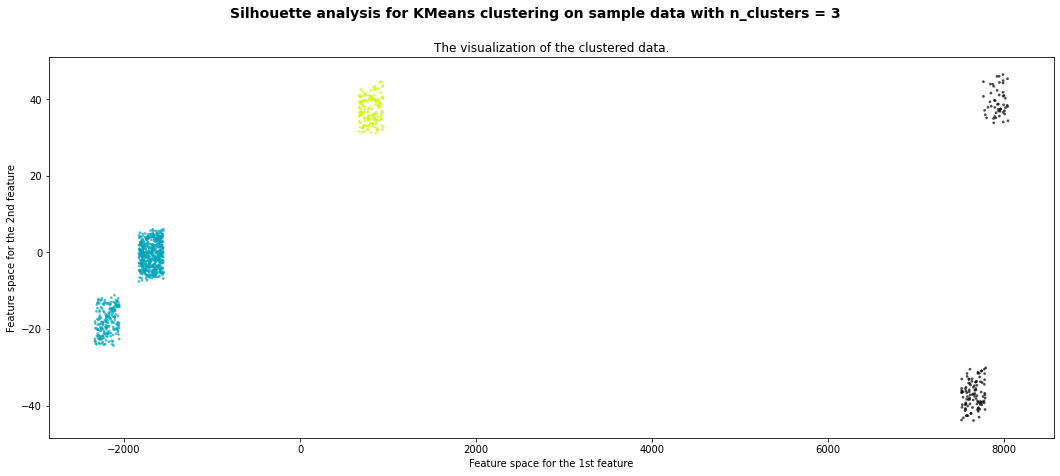

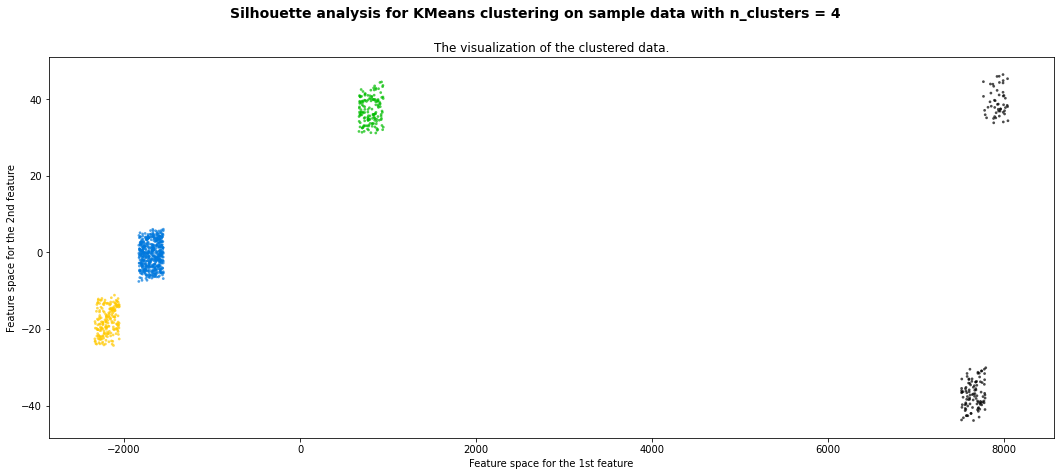

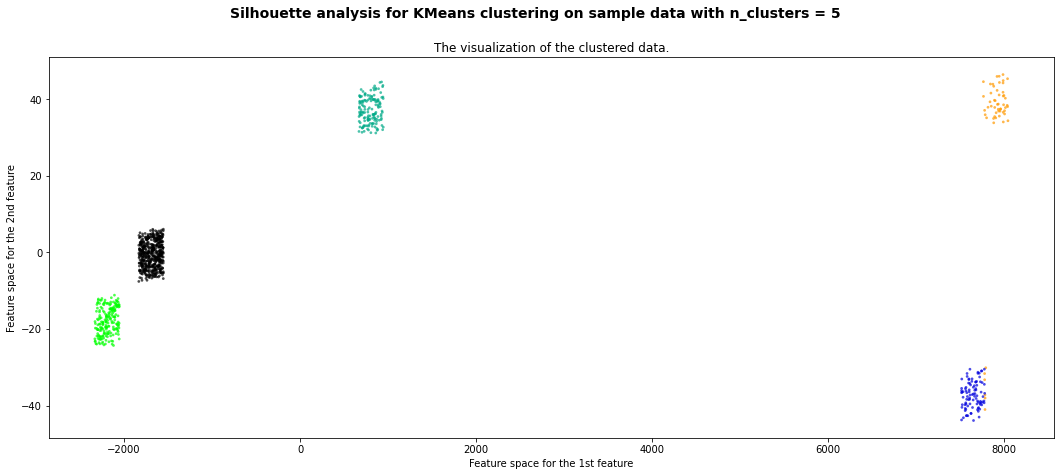

In [6]:
# Your code here. Add as many cells as you need!
range_n_clusters = [3, 4, 5]
num_seeds = 10

pca_q3 = PCA( n_components= 2)
pca_q3.fit(X)
X_scaled = pca_q3.transform(X)



for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    clusterer = KMeans(n_clusters=n_clusters, random_state=num_seeds)
    cluster_labels = clusterer.fit_predict(X)

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    ax1.set_title("The visualization of the clustered data.")
    ax1.set_xlabel("Feature space for the 1st feature")
    ax1.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


**Written answer** From the plots, the similar sizes from the scatter plot show 5 would be the best option

## Task 4: Deploying the model. [20 pts]

The objective of any cluster analysis over customer data is to create a reasonable segmentation of your customers. Using the number of clusters you have decided in Task 3 and a table of the averages per variable for each cluster, name the different clusters and think what would a company would do with a customer in that cluster. (*Hint: For example a clusters with high frequency, low recency, and low monetary value are desirable customers for whom it would be a good plan to try to increase their monetary value while keeping their high engagement. You could name them "Diamonds in the rough". [Pandas' `groupby`](https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average) can probably help.*)

In [14]:
# Your code here.
cl_pipe = Pipeline([
    ('kmeancl',KMeans(n_clusters=5)) 
])
cl_pipe.fit(X)

df['pred_cluster_q4'] = cl_pipe.predict(X)
df.groupby(['pred_cluster_q4']).mean()

,Recency,Frequency,MV,CoS
pred_cluster_q4,,,,
0,30.017272,5.059000,10494.803018,10000.188643
1,58.674804,50.200999,863.597411,1089.802615
2,59.809092,0.868768,8007.350500,11001.099604
3,14.911803,10.008273,10996.540746,9999.457148
4,4.373953,98.013580,1148.408062,1009.104620


**Written answer: (note this answer will be much longer than usual as you need to make an argument for every cluster)**

0: Bronze. These customers have low frequence while their customer value is rather high. The company should focus to make futher Development in these customers.

1: Classics. These customers have steady purchase frequency and the company should also keep this trend instead of putting too much effort.

2: Silver. These customers are similar with the bronze group but with higher customer values.

3: Gold. These customers have high potential but they are not very steay. I suggest that the company should make more efforts retaining these customers.

4: Titanium. These customers are our major target groups, we should offer extra promotion to maintain the good relationship with them.

## Task 5: Hierarchical clustering comparison [20 pts]

Now repeat the clustering process using a complete linkage hierarchical clustering with cosine affinity, using the same number of clusters as Task 4. Using the PCA transform you calculated in Task 3, create a scatterplot differentiating the obtained clusters using different colours. **Written answer: What can you say about the new clustering you obtained? Why does this happen? When would you say it is a good idea to use this configuration?** 

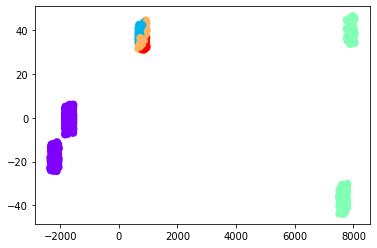

In [63]:
# Your code here
cluster_q5 = AgglomerativeClustering(n_clusters=5, affinity= 'cosine', linkage= 'complete')

df['PCA_clu'] = cluster_q5.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c= cluster_q5.labels_, s=50, cmap='rainbow')

**Written answer:** The new clustering is kind of mess, it did not really shows the ideal plot.